<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/W25-Assignment_1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
import plotly.express as px
import itertools
import scipy.stats as stats

# Problem 1

Helper function definitions

In [2]:
NB_STEPS = 1000
W_STD = 4
NB_DATA_POINTS = 100

np.random.seed(42)

def plot_graph(_mean, _std, distance_type):
  x_axis = np.arange(_mean - 4*_std, _mean + W_STD*_std, W_STD*_std/NB_STEPS)
  plt.plot(x_axis, norm.pdf(x_axis, _mean, _std))
  plt.title(distance_type)
  plt.show()

def find_distances_distribution(pairs, distance_type, remove_mean):
  if distance_type == 'l1':
    pair_distances = [np.sum(np.abs(px[0] - px[1])) for px in pairs]
  elif distance_type == 'l2':
    pair_distances = [np.linalg.norm(px[0] - px[1]) for px in pairs]
  elif distance_type == 'cosine':
    pair_distances = [1 - np.dot(px[0], px[1]) / (np.linalg.norm(px[0]) * np.linalg.norm(px[1])) for px in pairs]
  else:
    raise ValueError('Invalid distance type')


  if remove_mean:
    pair_distances = (pair_distances - np.mean(pair_distances)) # / np.std(pair_distances)

  _mean, _std = np.round(np.mean(pair_distances),2), np.round(np.std(pair_distances), 2)

  return _mean, _std, pair_distances


def generate_and_analyze_data(distance_type, remove_mean=False):

  # Plot the distributions
  plt.figure(figsize=(12, 8))

  for i in np.arange(2, 12, 2):
    d = 2**i
    data = np.random.randn(NB_DATA_POINTS, d)
    pairs = list(itertools.combinations(data, 2))

    _mean, _std, _ = find_distances_distribution(pairs, distance_type, remove_mean)

    x = np.linspace(_mean - 3*_std, _mean + 3*_std, 100)
    plt.plot(x, stats.norm.pdf(x, _mean, _std),
             label=f'd={d}, mu={_mean}, std={_std}')


    # KDE test
    # _, _, pair_distances = find_distances_distribution(pairs, distance_type, remove_mean)

    # kde = stats.gaussian_kde(pair_distances)
    # plt.plot(pair_distances, kde(pair_distances), label=f'd={d}')



  plt.title(f'Gaussian Fit for {distance_type} Distance')
  plt.xlabel('Distance')
  plt.ylabel('Density')
  plt.legend()


#generate_and_analyze_data('l1')

l1 space data analysis

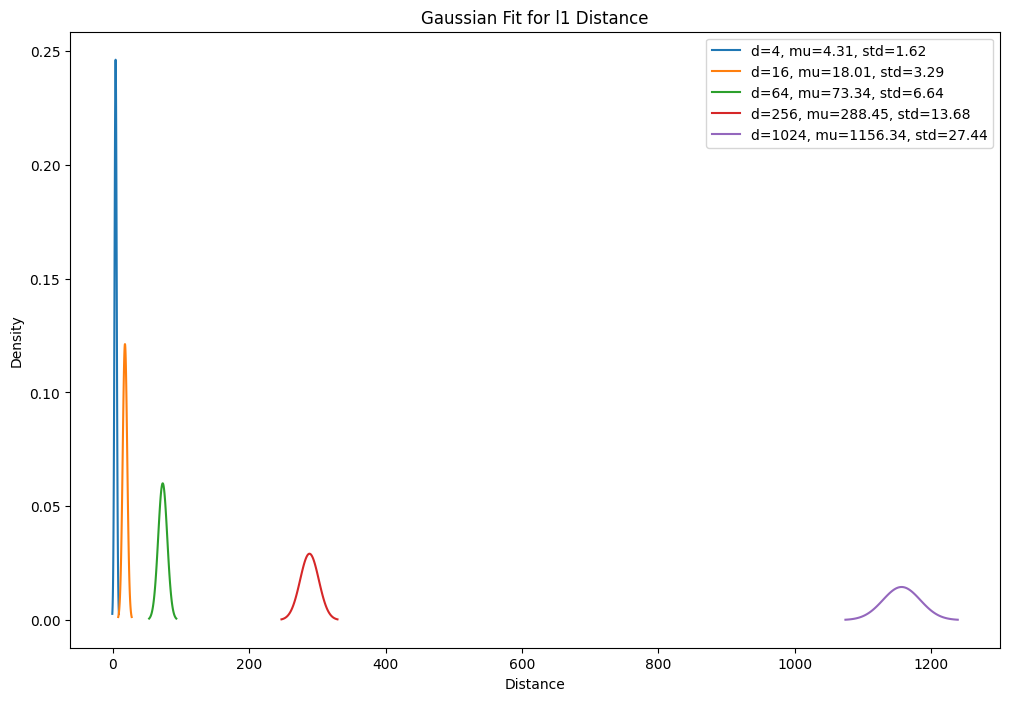

In [3]:
generate_and_analyze_data('l1')

Distance analysis in the l2 space

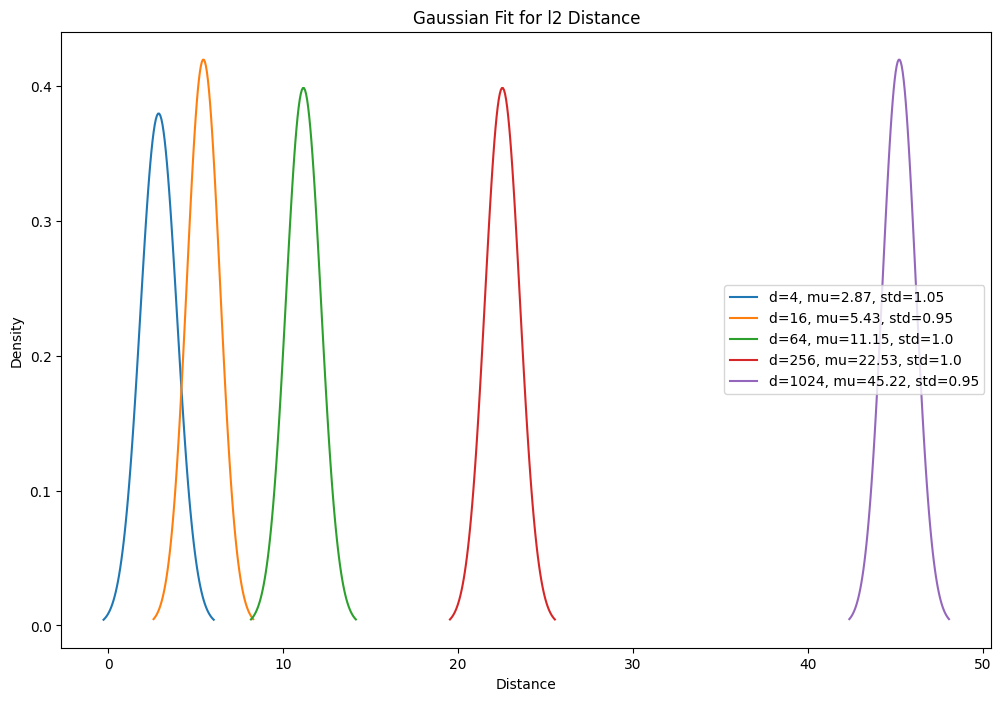

In [4]:
generate_and_analyze_data('l2')

Distance analysis in the 'cosine' space

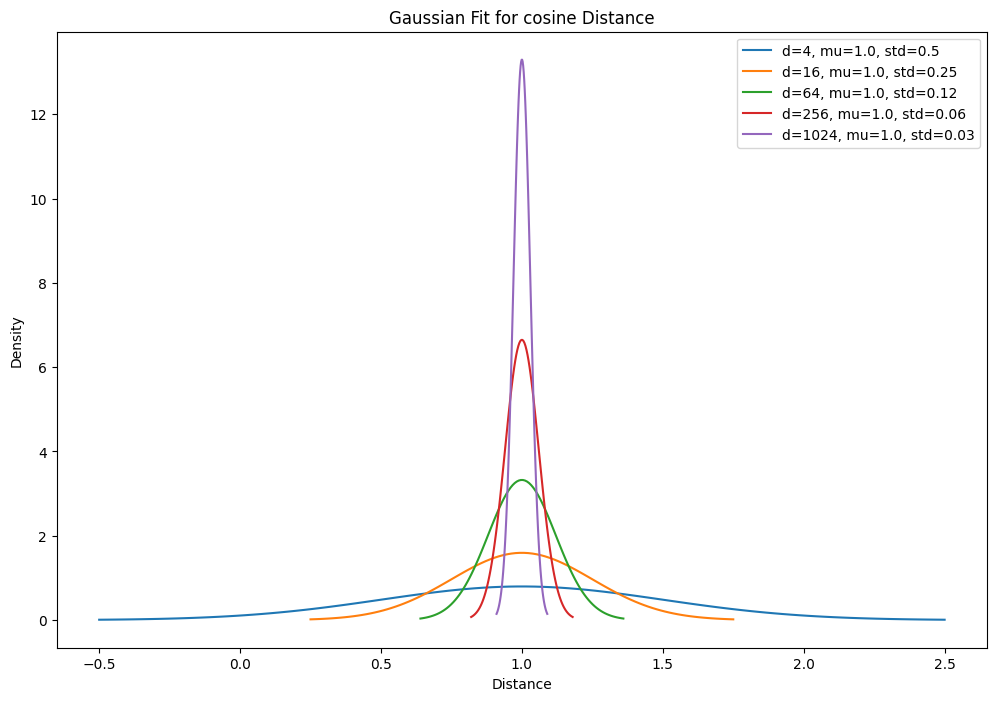

In [5]:
generate_and_analyze_data('cosine')

# Problem 2

In [6]:
female = pd.read_csv('https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/refs/heads/main/data/miscellaneous/female_nltk.csv')
male = pd.read_csv('https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/refs/heads/main/data/miscellaneous/male_nltk.csv')

Estimate the probability of female-student names starting with ”M”.

In [7]:
female['name'].str.startswith('M').sum()/len(female.name)

0.09678064387122576

In [8]:
female[female['name'].str.startswith('M')].shape[0] / female.shape[0]

0.09678064387122576

Estimate the log-probability of male-student names starting with ”F”.

In [9]:
#First find the probability that a male-student name starts with an F.
prob = male[male['name'].str.startswith('F')].shape[0] / male.shape[0]
#Then find the log-probability
log_prob = np.log(prob)
log_prob

-3.521276629578889

Estimate the log-probability of female or male-student names starting with ”Z”

In [10]:
male_female = pd.concat([male,female])
np.log(male_female[male_female['name'].str.startswith('Z')].shape[0] / male_female.shape[0])

-4.853037820679917

# Problem: 3

In [11]:
climate = pd.read_csv('https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/refs/heads/main/data/climate-change/climate_distortion.csv')
countries = pd.read_csv('https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/refs/heads/main/data/climate-change/country_region.csv')

a) null value imputations

In [12]:
climate.isnull().sum()

,0
Date,0
Region,0
Crop_Type,0
Average_Temperature_C,0
Total_Precipitation_mm,0
CO2_Emissions_MT,0
Crop_Yield_MT_per_HA,0
Extreme_Weather_Events,0
Irrigation_Access_%,0
Pesticide_Use_KG_per_HA,0


In [13]:
# Null value imputations
climate['Soil_Health_Index'] = climate['Soil_Health_Index'].fillna(climate['Soil_Health_Index'].mode()[0])
climate['Adaptation_Strategies'] = climate['Adaptation_Strategies'].fillna(climate['Adaptation_Strategies'].mode()[0])

b) How many unique Region(s) were recorded for USA?

In [14]:
countries[countries['Country'] == 'USA']['Region'].nunique()

4

In [15]:
data = pd.merge(climate, countries, on='Region', how='inner')
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.shape

(10000, 18)

c) Which country had the most and the least amount of ”CO2 Emissions MT” before and after 2000? What are these corresponding numbers?

In [16]:
## before or after 2000 splits
before_2000 = data[data['Year'] < 2000]
after_2000 = data[data["Year"] >= 2000]

In [17]:
before_2000_sum = before_2000.groupby('Country').agg({'CO2_Emissions_MT':'sum'})['CO2_Emissions_MT']
after_2000_sum = after_2000.groupby('Country').agg({'CO2_Emissions_MT':'sum'})['CO2_Emissions_MT']

In [18]:
print("Beofore 2000 max: {}, {}".format(before_2000_sum.idxmax(),
                                        before_2000_sum.max()))
print("Beofore 2000 min: {}, {}".format(before_2000_sum.idxmin(),
                                        before_2000_sum.min()))
print("After 2000 max: {}, {}".format(after_2000_sum.idxmax(),
                                        after_2000_sum.max()))
print("After 2000 min: {}, {}".format(after_2000_sum.idxmin(),
                                        after_2000_sum.min()))

Beofore 2000 max: Canada, 4862.48
Beofore 2000 min: Brazil, 3968.98
After 2000 max: USA, 11604.31
After 2000 min: Russia, 10172.85


d) What was the coolest date in the USA (based on the entire historical data recorded)?

In [20]:
usa = data[data['Country'] == 'USA']
usa.groupby('Date').agg({'Average_Temperature_C':'min'})['Average_Temperature_C'].idxmin()

Timestamp('2023-01-15 00:00:00')

e) What Crop Type from the ”Midwest(U)” and the ”Northeast(U)” Regions together in the USA had the highest historical economic impact (”Economic Impact Million USD”)?

In [21]:
mid_north = usa[(usa['Region'] == 'Midwest(U)') | (usa['Region'] == 'Northeast(U)')]
mid_north_gp = mid_north.groupby('Crop_Type').agg({'Economic_Impact_Million_USD':'sum'})['Economic_Impact_Million_USD']
mid_north_gp.idxmax(), mid_north_gp.max()

('Vegetables', 38069.94)

f) What was the yearly average precipitation (’Total Precipitation mm’) in USA? Display these yearly average precipitation values through a graph.

<Axes: xlabel='Year'>

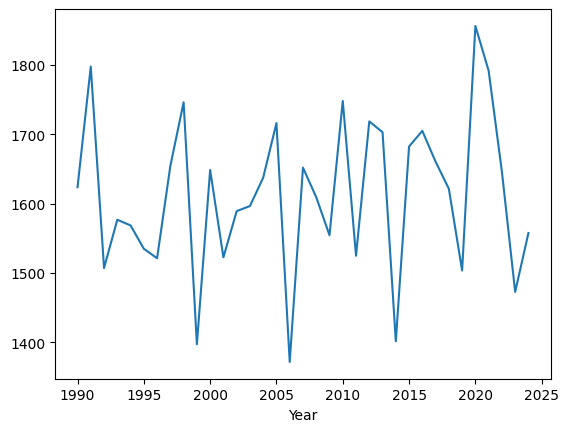

In [22]:
usa.groupby('Year').agg({'Total_Precipitation_mm':'mean'})['Total_Precipitation_mm'].plot()

g) Which of the following variable pairs has the highest and the lowest associations? If you find a tie, pick one from those. (2) • Average Temperature C, • Total Precipitation mm, • CO2 Emissions MT, • Extreme Weather Events, • Pesticide Use KG per HA, • Fertilizer Use KG per HA, • Soil Health Index, • Economic Impact Million USD 2

In [23]:
variables = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index', 'Economic_Impact_Million_USD']
correlation_matrix = data[variables].corr()

In [24]:
correlation_matrix

,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Extreme_Weather_Events,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
Average_Temperature_C,1.000000,0.007213,-0.003052,-0.016808,0.005764,-0.014725,-0.010973,0.195827
Total_Precipitation_mm,0.007213,1.000000,-0.008681,0.004360,0.011198,-0.026356,-0.021568,0.020966
CO2_Emissions_MT,-0.003052,-0.008681,1.000000,0.001255,0.015243,-0.020275,0.004135,-0.057035
Extreme_Weather_Events,-0.016808,0.004360,0.001255,1.000000,0.010497,0.014754,0.016543,-0.004526
Pesticide_Use_KG_per_HA,0.005764,0.011198,0.015243,0.010497,1.000000,-0.015429,0.012680,-0.007796
Fertilizer_Use_KG_per_HA,-0.014725,-0.026356,-0.020275,0.014754,-0.015429,1.000000,-0.000254,0.010743
Soil_Health_Index,-0.010973,-0.021568,0.004135,0.016543,0.012680,-0.000254,1.000000,-0.000057
Economic_Impact_Million_USD,0.195827,0.020966,-0.057035,-0.004526,-0.007796,0.010743,-0.000057,1.000000


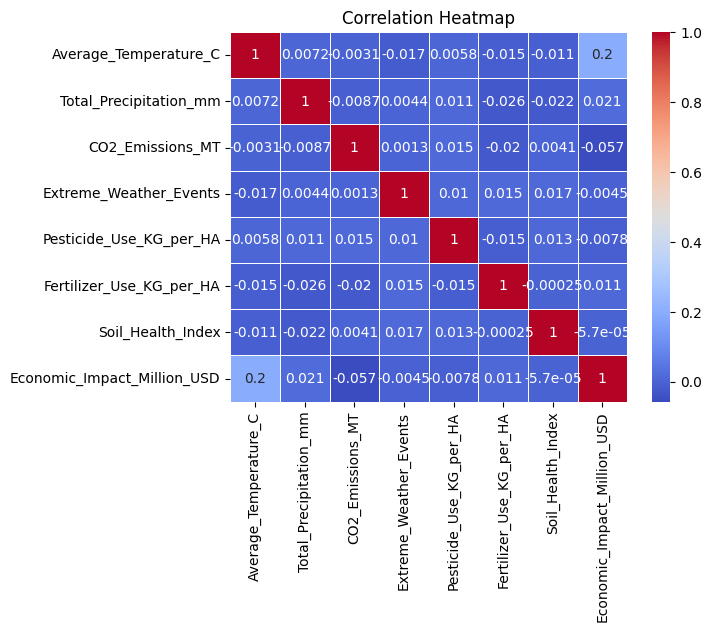

In [25]:
# Create the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Avergae_Temperature_C and Economic Impact have the highest correlation at 0.196 and Soil_Health_Index and Economic_Impact had the lowest correlation at ~0.00006.

You can also use the following code to automate this process

Lowest correlation pair

In [26]:
correlation_matrix.abs().unstack().sort_values(ascending=True).head(1)

,,0
Soil_Health_Index,Economic_Impact_Million_USD,0.000057


Highest correlation pair

In [27]:
masked_corr = correlation_matrix
for ix in range(len(variables)):
    masked_corr.iloc[ix, ix] = 0
masked_corr.abs().unstack().sort_values(ascending=False).head(1)

,,0
Economic_Impact_Million_USD,Average_Temperature_C,0.195827
